In [1]:
a = "H"

In [9]:
import dill
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

In [14]:
with open("HDP_models_traces.pkl", "rb") as f:
    models, traces, datasets, a_all, b_all = dill.load(f)

RANDOM_SEED = 42

In [10]:
def summary_HDP(trace, model, N_sources=1, k=1):
    """
    Summarize and visualize the HDP model results.

    :param trace: Trace of the model
    :param model: The model being summarized
    :param N_sources: Number of sources
    :param k: Number of components for the model
    :return: None
    """
    # Variable names to summarize
    var_names = ["α", "β", "σ", "gamma", "alpha0", "beta"]
    # Add π_norm for each source
    for s in range(N_sources):
        var_names.append(f"pi_{s}")
        var_names.append(f"pi_norm_{s}")
    
    # Print summary of the trace
    print(az.summary(trace, var_names=var_names))
    print("Trace summary completed.")

    # Plot trace and posterior distributions
    az.plot_trace(trace, var_names=["α", "β", "σ", "gamma", "alpha0", "beta"])
    plt.show()

    with model:
        posterior_predictive = pm.sample_posterior_predictive(trace, random_seed=RANDOM_SEED)
    
    az.plot_posterior(trace, var_names=["α", "β", "σ", "gamma", "alpha0", "beta"])
    plt.show()

    az.plot_ppc(posterior_predictive, num_pp_samples=1000)
    plt.show()

    # Bar plot of posterior expected mixture weights
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_w = np.arange(k) + 1  # Component indices
    for s in range(N_sources):
        weights = trace.posterior[f"pi_norm_{s}"].mean(("chain", "draw"))
        ax.bar(
            plot_w - 0.5 + s * 0.1,  # Offset for sources
            weights,
            width=0.1, label=f"Source {s + 1}",
        )
    
    ax.set_xlim(0.5, k + 0.5)
    ax.set_xlabel("Component")
    ax.set_ylabel("Posterior expected mixture weight")
    ax.legend(title="Sources")
    plt.show()

Running model for setting with 2 sources and 2 components.
True proportions for sources: [array([0.13487081, 0.86512919]), array([0.59055148, 0.40944852])]
True regression parameters (a, b): [0, 10], [5, 10]
                mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
α[0, 0]        0.000  0.000  -0.000    0.001      0.000    0.000    3989.0   
α[0, 1]       10.000  0.001   9.998   10.002      0.000    0.000    7505.0   
β[0, 0]        5.000  0.000   5.000    5.000      0.000    0.000    4711.0   
β[0, 1]       10.000  0.000  10.000   10.000      0.000    0.000    7102.0   
σ[0]           0.010  0.000   0.010    0.011      0.000    0.000    3922.0   
σ[1]           0.010  0.000   0.010    0.010      0.000    0.000    7520.0   
gamma          0.431  0.248   0.040    0.869      0.004    0.003    3313.0   
alpha0         0.589  0.303   0.130    1.136      0.007    0.005    1534.0   
beta[0]        0.444  0.177   0.122    0.763      0.004    0.003    1913.0   
beta[1]     

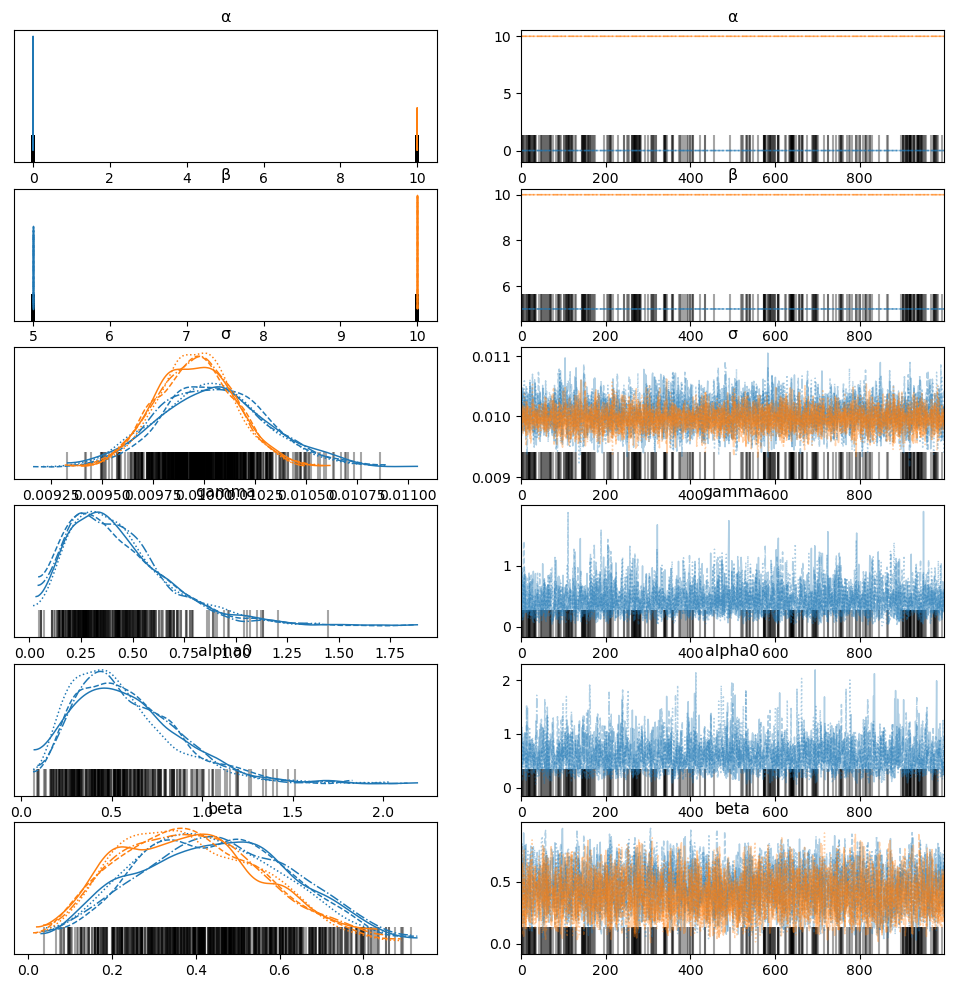

Sampling: [likelihood_0, likelihood_1]


Output()

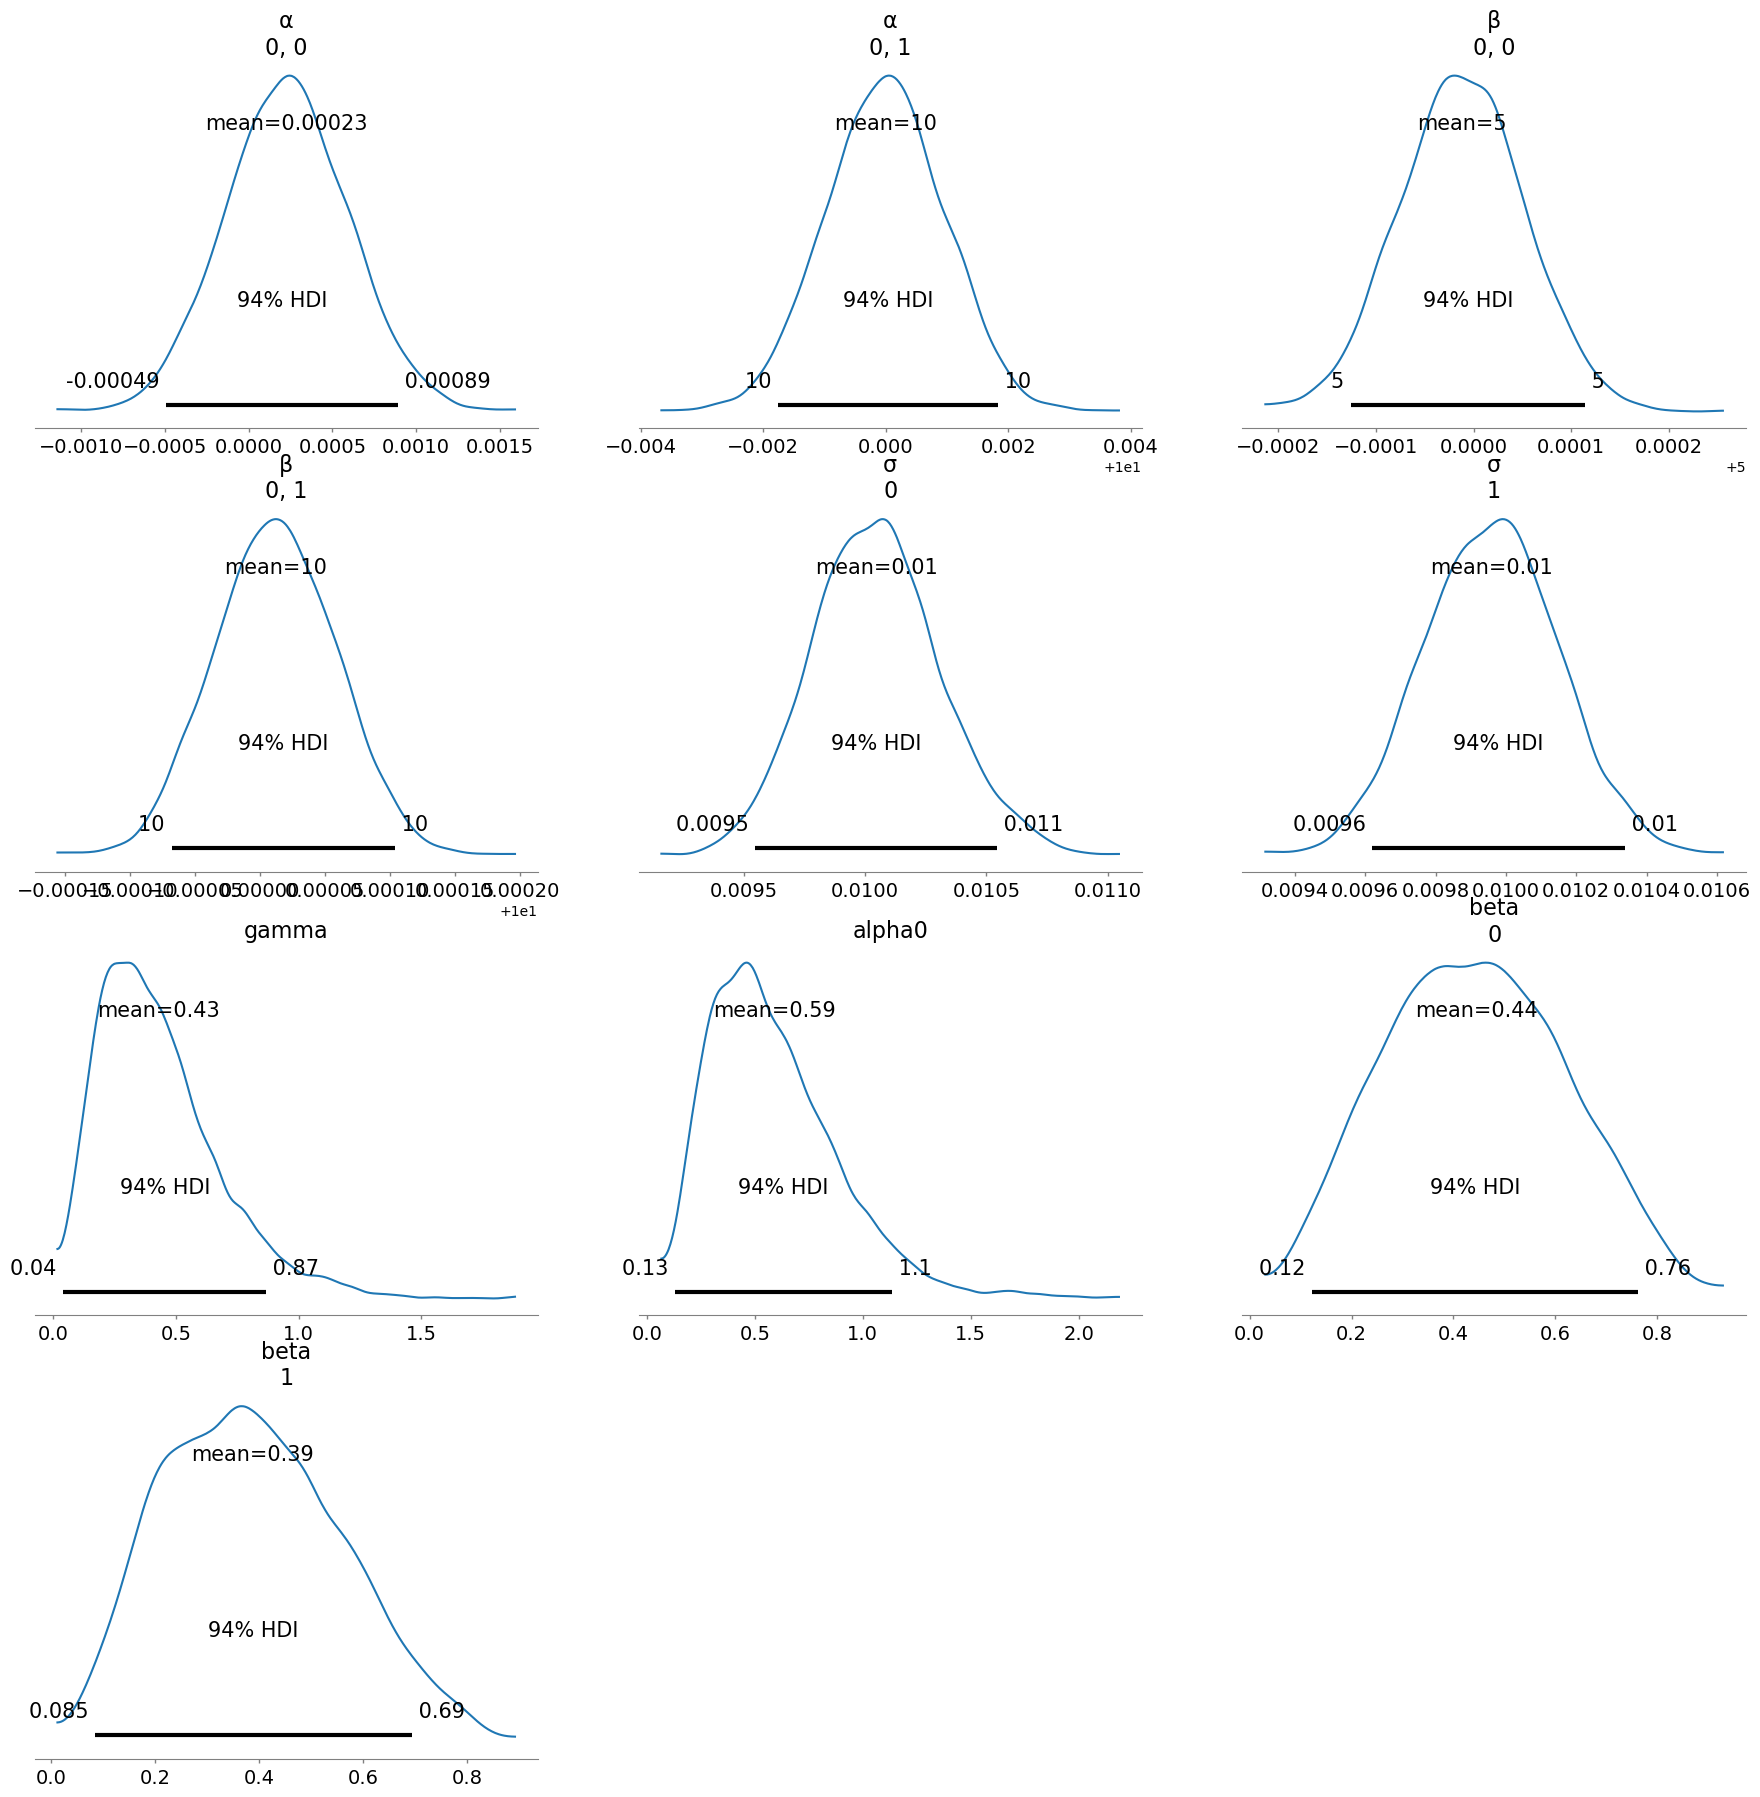

C:\Users\10191\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1000,) + inhomogeneous part.

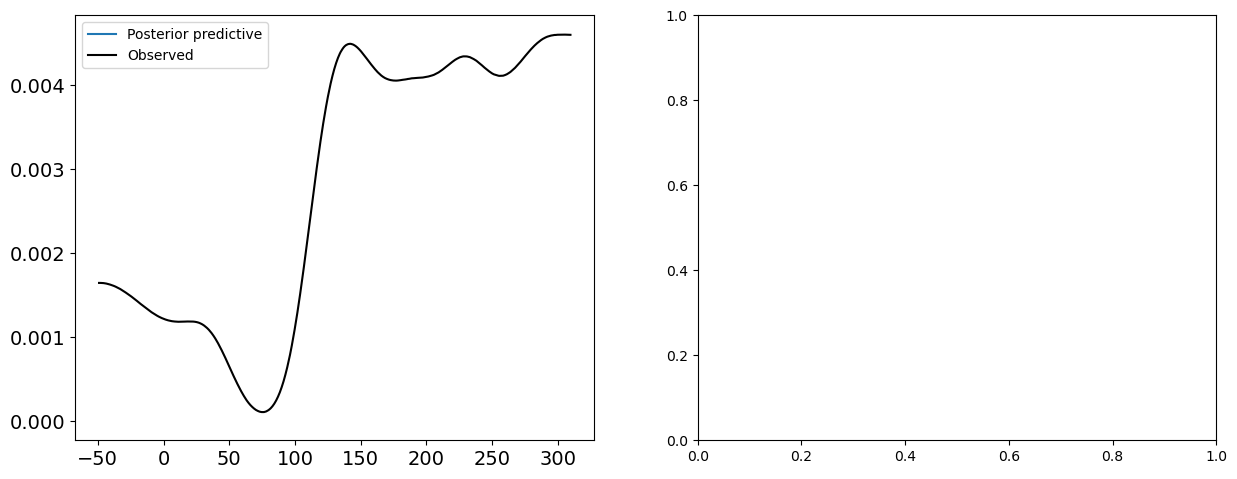

In [15]:
for (ns, nc), (X, Y, proportions) in datasets.items():
    print(f"Running model for setting with {ns} sources and {nc} components.")
    print(f"True proportions for sources: {proportions}")
    print(f"True regression parameters (a, b): {a_all[nc - 2]}, {b_all[nc - 2]}")
    summary_HDP(traces[(ns, nc)], models[(ns, nc)], N_sources=ns, k=nc)